In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz
import os
                                    os.environ["PATH"] += os.pathsep + 'C:\\install\\graphviz-2.38\\release\\bin'

In [15]:
df = pd.read_csv("for_tree.csv")
df.head(5)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.24,0.2879,0.81,0.0,3,13,16
1,0.22,0.2727,0.80,0.0,8,32,40
2,0.22,0.2727,0.80,0.0,5,27,32
3,0.24,0.2879,0.75,0.0,3,10,13
4,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
X = df.iloc[:500,:-1].values
print("X.SHAPE : ",X.shape)
#print("min -",np.sort(X[:,0]))
Y = df.iloc[:500,-1].values
print("mean: ",np.mean(Y))
print("Y.SHAPE : ",Y.shape)
d = DecisionTreeRegressor(max_depth=3)
d.fit(X,Y)
print(d.get_params())
print(d.tree_.feature)

X.SHAPE :  (500, 6)
mean:  55.88
Y.SHAPE :  (500,)
{'criterion': 'mse', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
[ 5  5  5 -2 -2  5 -2 -2  5  5 -2 -2  5 -2 -2]


In [37]:
dot_data = tree.export_graphviz(d, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 
df.columns[:-1]

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], dtype='object')

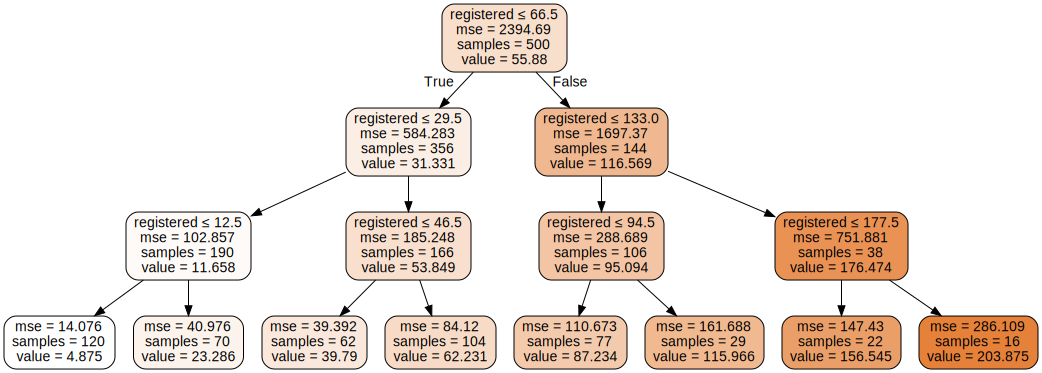

In [38]:
dot_data = tree.export_graphviz(d, out_file=None, 
                     feature_names=df.columns[:-1],  
                     class_names=df.columns[-1],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph